# Data Science Salaries in 2023

### Importin libraries

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import Dataset

In [142]:
PATH = "ds_salaries.csv"
dataset = pd.read_csv(PATH)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [143]:
dataset = dataset.drop(["salary_currency", "salary"], axis=1)
dataset.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M


## Data preprocessing

### Swap company_size & salary_in_usd columns to place matrix of features in last column

In [144]:
col_list = dataset.columns.tolist()
x, y = col_list.index("salary_in_usd"), col_list.index("company_size")
col_list[x], col_list[y] = col_list[y], col_list[x]
dataset = dataset[col_list]
dataset.head()

,work_year,experience_level,employment_type,job_title,company_size,employee_residence,remote_ratio,company_location,salary_in_usd
0,2023,SE,FT,Principal Data Scientist,L,ES,100,ES,85847
1,2023,MI,CT,ML Engineer,S,US,100,US,30000
2,2023,MI,CT,ML Engineer,S,US,100,US,25500
3,2023,SE,FT,Data Scientist,M,CA,100,CA,175000
4,2023,SE,FT,Data Scientist,M,CA,100,CA,120000


### Handle categorical data

In [145]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()


def label_encoding(columnName):
    dataset[columnName] = LabelEncoder().fit_transform(dataset[columnName])


label_encoding("company_size")
label_encoding("experience_level")
label_encoding("job_title")
label_encoding("employee_residence")
label_encoding("employment_type")
label_encoding("company_location")

dataset.head()

,work_year,experience_level,employment_type,job_title,company_size,employee_residence,remote_ratio,company_location,salary_in_usd
0,2023,3,2,84,0,26,100,25,85847
1,2023,2,0,66,2,75,100,70,30000
2,2023,2,0,66,2,75,100,70,25500
3,2023,3,2,47,1,11,100,12,175000
4,2023,3,2,47,1,11,100,12,120000


### Spiliting Data to train & test sets

In [146]:
from sklearn.model_selection import train_test_split

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X)
print(y)

[[2023    3    2 ...   26  100   25]
 [2023    2    0 ...   75  100   70]
 [2023    2    0 ...   75  100   70]
 ...
 [2020    0    2 ...   75  100   70]
 [2020    0    0 ...   75  100   70]
 [2021    3    2 ...   39   50   38]]
[ 85847  30000  25500 ... 105000 100000  94665]


## Model Training

In [147]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=70, max_depth=10, random_state=0)
regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=70, random_state=0)

### Predicting the test set

In [148]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[159065.41 126000.  ]
 [119696.95 109000.  ]
 [121599.95 200000.  ]
 ...
 [119696.95 160000.  ]
 [157082.91 129300.  ]
 [154309.6  110500.  ]]


### Evaluating the Model Performance

In [149]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.406680080350589

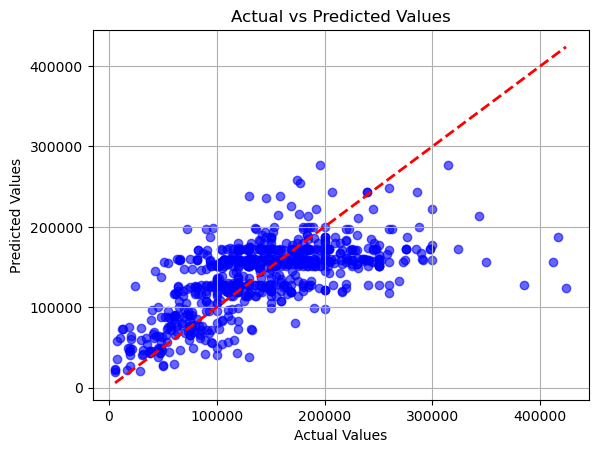

In [150]:
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

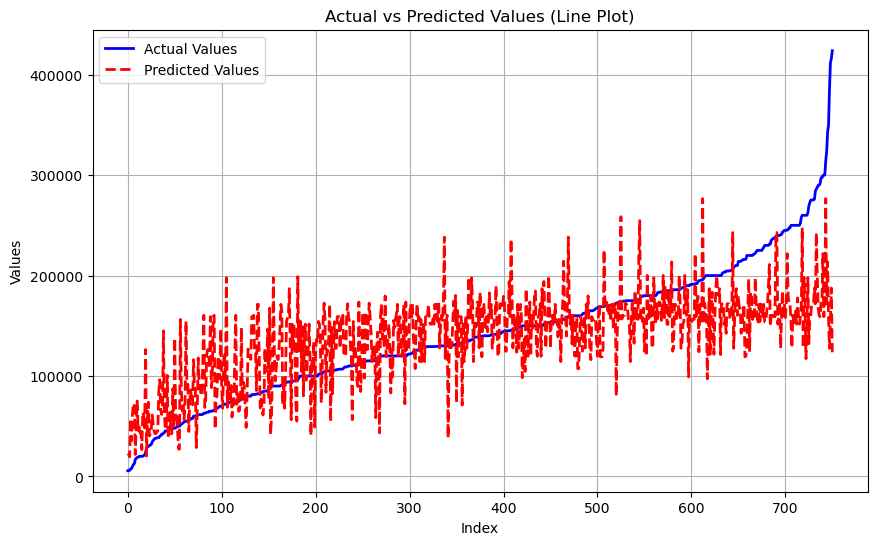

In [153]:
sorted_indices = np.argsort(y_test)
y_test_sorted = y_test[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test_sorted, label='Actual Values', color='blue', linewidth=2)
plt.plot(y_pred_sorted, label='Predicted Values', color='red', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Values (Line Plot)')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()